# Project Title Here

**Names**: Yuteng Zhuang (yutengz2)， Yijun Wang (yijun4)

You can delete and add as many code blocks as you like or change the formatting.

## 1. Introduction and Dataset Research

Section 1.1: <br>
Nowadays, attrition of health care workers in the US health care system has become a major problem, especially since 2020 due to COVID-19 pandemic. “Although the industry has been resilient, the pandemic has further amplified and stressed the labor market and shortage.” (Colosi, 2022) Due to the nature of the profession, health care workers suffered from long worktime, high workload, and stress, which leads to an all-time high attrition rate. (Falatah, 2021) The factors that lead to healthcare employees’ attrition should be carefully examined, especially sensitive attributes, as past findings do show that age, gender, and ethnicity have an impact on attrition rates. (Pryjmachuk et al., 2009) Therefore, we want to seek for whether the attrition rates are related to unfair or discriminate treatment of workers based on their sensitive attributes, specifically gender. In order to do that, this report explores Watson healthcare dataset, a synthetic variation from the IBM Watson dataset that includes US health care employees’ attrition rates (resignation). 
When the healthcare company or hospital administration predict the chances of whether an employee will resign using classification algorithms, where sensitive features like gender, age and marital status are included that will likely to produce discriminatory results.

Section 1.2: <br>
Under the situation above, employees and the employers are the potential stakeholders. For the employees, the impact is largely negative, as they will receive unfair treatment if the prediction is false positive. For the employers, there are pros and cons. On one hand, using classification algorithm will produce efficient results and help them to make well-thought decisions. On the other hand, the judgement from the algorithms will likely lead to a lost of trust from the employees, especially when the prediction is wrong. In addition, it will bring privacy and discrimination concerns for the company when sensitive information is included in the dataset collected. 
It should also be noted that the general public is also highly involved. They have the initiates that there are sufficient health care resources. Thus, the algorithm is a double-edged sword. When the prediction is accurate, transitions and turnovers will become smoother and reduce the chance of sudden deficit of healthcare resources. When the predictions cause distrust, more employees will likely to leave, causing an increasing chance of medical squeeze. Therefore, the fairness aspect of the algorithm needs cautious use and full evaluation on potential discriminating factors. 

Section 1.3: <br>
For the employees, privacy, trust and fairness are highly valued. They want the classification system to be as transparent as possible and make sure that their private information is not being judged. The employees do not want a false classification as they do not want to be treated in discriminative way, usually implicit. For the employers, efficiency and fairness are valued. From the company's and hospital's standpoint, a good classification will help with a smooth operation. However, a false classification will result in loss of employee's trust, which will escalate the attition rates and bring significant moral and ethical issues. There exist a contridiction between employee trust against company logistics, which heavily influences patients and public’s trust. (must keep a certain number of workers for hospital operations)

Section 1.4: <br>
This study will heavily focus on equal opportunity between all healthcare workers. equal oppotunity focuses on making sure that the true positive rates among different groups are the same. It would be considered fair when each groups are equal when it comes to the chances of correct classification. This metric is particularly useful when false negatives are more harmful than false positives, loss of healthcare worker's trust in this case.
For benifits, equal opportunity reduces discrimination against unpriviliged groups and this will ensure that they are correctly identified. In addition, this metric will help reduce the chance of false negatives, which is pretty important under the situation. 
For critiques, equal opportunity approach might cause reverse discrimination: making the model biased towards the opposite groups. In addition, these approaches might be hard to enforce on very different groups, which will leads to a decrease in accuracy of classification. To avoid these disadvantages, this report will consider more comprehensive fairness metrics like equalized odds, which treated TPR and TNR equally, comparing the results and produce a thought-out result. In order to comprehensively and objectively evaluate the fairness of the model, statistically disparity, equalized odds, and data visualization are used in this report to evaluate the fairness of the model, and ensure the transparency of the algorithm.


Section 1.5: <br>
See citation below.

Section 1.6: <br>
a.	“The data is synthetic and based on the IBM Watson dataset for attrition. Employee roles and departments were changed to reflect the healthcare domain. Also, known outcomes for some employees were changed to help increase the performance of ML models.” (JohnM, 2023) (Need relavent variables)
<br>b. JohnM. Feb 15, 2023. Employee Attrition for Healthcare, Retrieved May 8, 2023 from https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare.
<br>c. Along with the target variable Attrition and  sensitive attribute gender, other related features are included, such as age, dailyrate,distance from home, environment satisfaction, job role, and marital status

Section 1.7: <br>
This report utilized 2 basic predictive models, logistic regression model and random forestmodel. For the logistic regression model, the data will be pre-processed using reweighting and post processed using equalized odds. For the random forest model, the data will be in-processed using prejudice remover method and post-processed using LIME explainer model. All data in the report is based on the above data set. 



Citation: <br>
Colosi, B. (2022). (publication). 2022 NSI National Health Care Retention & RN Staffing Report. NSI Nursing Solutions, Inc. Retrieved May 8, 2023, from https://www.nsinursingsolutions.com/. 

Pryjmachuk, S., Easton, K., & Littlewood, A. (2009). Nurse education: Factors associated with attrition. Journal of Advanced Nursing, 65(1), 149–160. https://doi.org/10.1111/j.1365-2648.2008.04852.x 

Falatah, R. The Impact of the Coronavirus Disease (COVID-19) Pandemic on Nurses’ Turnover Intention: An Integrative Review. Nurs. Rep. 2021, 11, 787–810. https:// doi.org/10.3390/nursrep11040075

JohnM. Feb 15, 2023. Employee Attrition for Healthcare, Retrieved May 8, 2023 from https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare.


## 2. Data Processing

The dataset we use are from https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare <br>
This dataset are about Employee Attrition for Healthcare.

In [29]:
# import packages that are necessary in data preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from aif360.datasets import StandardDataset
import numpy as np
from aif360.algorithms.preprocessing import Reweighing

In [30]:
# Section 2.1
df = pd.read_csv('data/watson_healthcare_modified.csv')
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [31]:
# in data preprocessing, we want to drop some unnecessary features and change some binary data to 0-1.
df.drop('EmployeeID', axis=1, inplace=True)
df.drop('Over18', axis=1, inplace=True)
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})

In [32]:
# Use one hot encode to change Categorical Data to binary
dummies = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
df = pd.concat([df, dummies], axis=1)
df.drop('BusinessTravel', axis=1, inplace=True)

dummies = pd.get_dummies(df['Department'], prefix='Department')
df = pd.concat([df, dummies], axis=1)
df.drop('Department', axis=1, inplace=True)

dummies = pd.get_dummies(df['EducationField'], prefix='EducationField')
df = pd.concat([df, dummies], axis=1)
df.drop('EducationField', axis=1, inplace=True)

dummies = pd.get_dummies(df['JobRole'], prefix='JobRole')
df = pd.concat([df, dummies], axis=1)
df.drop('JobRole', axis=1, inplace=True)

dummies = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
df = pd.concat([df, dummies], axis=1)
df.drop('MaritalStatus', axis=1, inplace=True)

In [33]:
df.dropna(inplace=True)

In [34]:
# unique_values = df['Over18'].unique()
# print(unique_values)
# unique_values = df['Department'].unique()
# print(unique_values)
# unique_values = df['EducationField'].unique()
# print(unique_values)
# unique_values = df['JobRole'].unique()
# print(unique_values)
# unique_values = df['MaritalStatus'].unique()
# print(unique_values)

Section 2.2: <br>
Because the basic data preprocessing merely change column to binary and dropping non-binary catagorical variables, there should not be impact to the stakeholders. Nevertheless, it is possible that the dropped features have impact on the classification and droping them might result in a reduced accuracy, which could be explored further in a different study. 

In [35]:
# Section 2.3
sd = StandardDataset(df, 
                    label_name='Attrition', 
                    favorable_classes=[1], 
                    protected_attribute_names=['Gender'], 
                    privileged_classes=[[1]])
sd

               instance weights features                                       \
                                                                                
                                     Age DailyRate DistanceFromHome Education   
instance names                                                                  
0                           1.0     41.0    1102.0              1.0       2.0   
1                           1.0     49.0     279.0              8.0       1.0   
2                           1.0     37.0    1373.0              2.0       2.0   
3                           1.0     33.0    1392.0              3.0       4.0   
4                           1.0     27.0     591.0              2.0       1.0   
...                         ...      ...       ...              ...       ...   
1671                        1.0     26.0     471.0             24.0       3.0   
1672                        1.0     46.0    1125.0             10.0       3.0   
1673                        

In [36]:
# 2.3 Split the triannin set and testing set
np.random.seed(100)
sd_train, sd_test = sd.split([0.8], shuffle=True)
df_test = sd_test.convert_to_dataframe()[0]
df_train = sd_train.convert_to_dataframe()[0]

In [37]:
# 2.4 Then, I want to use re-Weighting as my pre-processing algorithm
unpriv_group = [{'Gender':0}]
priv_group = [{'Gender':1}]
rw = Reweighing(unprivileged_groups = unpriv_group, privileged_groups = priv_group)
rw.fit(sd_train)
sd_reweight = rw.transform(sd_train)
np.unique(sd_reweight.instance_weights)
df_train['weights']=sd_reweight.instance_weights

df_train

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition,weights
555,35.0,1225.0,2.0,4.0,1.0,4.0,0.0,61.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.993355
1530,37.0,674.0,13.0,3.0,1.0,1.0,1.0,47.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.004708
1003,49.0,1475.0,28.0,2.0,1.0,1.0,1.0,97.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.004708
521,50.0,1207.0,28.0,1.0,1.0,4.0,1.0,74.0,4.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.004708
719,50.0,939.0,24.0,3.0,1.0,4.0,1.0,95.0,3.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.004708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,49.0,1261.0,7.0,3.0,1.0,2.0,1.0,31.0,2.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.004708
899,27.0,1167.0,4.0,2.0,1.0,1.0,1.0,76.0,3.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.004708
895,43.0,920.0,3.0,3.0,1.0,3.0,1.0,96.0,1.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.004708
470,38.0,1495.0,10.0,3.0,1.0,3.0,0.0,76.0,3.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.993355


In [38]:
X_train = sd_train.features
X_train = np.delete(X_train, 6, axis=1)
X_train

array([[3.500e+01, 1.225e+03, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.700e+01, 6.740e+02, 1.300e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.900e+01, 1.475e+03, 2.800e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [4.300e+01, 9.200e+02, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.800e+01, 1.495e+03, 1.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.600e+01, 1.456e+03, 1.300e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [39]:
Y_train = sd_train.labels.ravel()
Y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
X_test = sd_test.features
X_test = np.delete(X_test, 6, axis=1)
X_test

array([[4.70e+01, 1.18e+03, 2.50e+01, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [3.50e+01, 6.07e+02, 9.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.00e+01, 8.52e+02, 1.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [4.60e+01, 9.45e+02, 5.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [3.70e+01, 3.09e+02, 1.00e+01, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+01, 2.01e+02, 5.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00]])

In [41]:
Y_test = sd_test.labels.ravel()
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

2.4. Explaination 
Section a.
Both the logistic regression model and random forest model utilize reweighting for pre-processing. 

Section b.
This method ensures fairness as it address balance across groups, which adjust the model to pay more attention on the unrepresented class. It will also increase generalization of the population where the sample is drawn. On the other hand, reweighting can lead to overfitting. In addition, it requires careful examination of determinating right weights to avoid biases. 

Section c. 
As the code described above, weights are calculated based on the proportion of each groups and will help encourage unpriviliged groups to be better fit to the model. 




## 3. Basic Descriptive Analytics and Dataset Benchmarking

In [42]:
# Section 3.
# 1(a) show basic information of all numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_stats = df[numeric_cols].describe()
print(numeric_stats)

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1676.000000  1676.000000  1676.000000       1676.000000  1676.000000   
mean     36.866348     0.118735   800.557876          9.221957     2.907518   
std       9.129126     0.323573   401.594438          8.158118     1.025835   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   796.500000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EnvironmentSatisfaction       Gender   HourlyRate  \
count         1676.0              1676.000000  1676.000000  1676.000000   
mean             1.0                 2.714797     0.595465    65.470167   
std              0.0                 1.097534     0.490948    2

In [43]:
# 1(b) Since I've converted all catogrical value to binary value. I will count original file.
df_tmp = pd.read_csv('data/watson_healthcare_modified.csv')
categorical_cols = df_tmp.select_dtypes(include=['object']).columns
for col in categorical_cols:
    value_counts = df_tmp[col].value_counts()
    print(f"Value counts for {col}:")
    print(value_counts)
    print()



Value counts for Attrition:
No     1477
Yes     199
Name: Attrition, dtype: int64

Value counts for BusinessTravel:
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

Value counts for Department:
Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

Value counts for EducationField:
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

Value counts for Gender:
Male      998
Female    678
Name: Gender, dtype: int64

Value counts for JobRole:
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

Value counts for MaritalStatus:
Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

Value counts for Over18:
Y    1676
Name: Over18, dtype: int64

Value counts for O

In [44]:
# 1(c) Compute the correlation matrix and do some data visualization
corr_matrix = df.corr()
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
print(corr_matrix)
# sns.pairplot(df.select_dtypes(include=['float64', 'int64']))

                                       Age  Attrition  DailyRate  \
Age                               1.000000  -0.239984   0.001441   
Attrition                        -0.239984   1.000000  -0.053892   
DailyRate                         0.001441  -0.053892   1.000000   
DistanceFromHome                 -0.010079   0.105580  -0.009227   
Education                         0.204655  -0.038843  -0.015881   
EmployeeCount                          NaN        NaN        NaN   
EnvironmentSatisfaction           0.008945  -0.101278   0.010620   
Gender                           -0.041642  -0.020661  -0.007497   
HourlyRate                        0.034671  -0.036300   0.027128   
JobInvolvement                    0.034193  -0.166036   0.058864   
JobLevel                          0.518333  -0.207634   0.009005   
JobSatisfaction                  -0.015848  -0.081881   0.032115   
MonthlyIncome                     0.511378  -0.193527   0.011030   
MonthlyRate                       0.025837   0.0

In [45]:
# We first filter all correlation coefficient that are larger than 0.7 and print them to show strong correlation
strong_corr = corr_matrix[abs(corr_matrix) >= 0.7]
strong_corr = strong_corr[strong_corr != 1].dropna(how='all').dropna(how='all', axis=1)
strong_corr = strong_corr.unstack().sort_values(ascending=False)
print(strong_corr)

JobLevel                      MonthlyIncome                   0.951572
MonthlyIncome                 JobLevel                        0.951572
JobLevel                      TotalWorkingYears               0.780929
TotalWorkingYears             JobLevel                        0.780929
MonthlyIncome                 TotalWorkingYears               0.772938
                                                                ...   
BusinessTravel_Travel_Rarely  TotalWorkingYears                    NaN
                              YearsAtCompany                       NaN
                              YearsInCurrentRole                   NaN
                              YearsWithCurrManager                 NaN
                              BusinessTravel_Travel_Rarely         NaN
Length: 100, dtype: float64


In [46]:
# Section 3.2
male_count = (df_test['Gender'] == 1).sum()
female_count = (df_test['Gender'] == 0).sum()
male_prediction = df_test.loc[df_test['Gender'] == 1, 'Attrition']
female_prediction = df_test.loc[df_test['Gender'] == 0, 'Attrition']
Statistical_Parity_Test = abs(male_prediction.mean() - female_prediction.mean())

print('Statistical_Parity_Test:', Statistical_Parity_Test)

Statistical_Parity_Test: 0.11269841269841269


In [47]:
# Section 3.3
# Conditional Statistical Parity between Gender and Over Time(Binary)
sensitive_attr = 'Gender'
legitimate_var = 'OverTime'
legitimate_values = df_test[legitimate_var].unique()
for val in legitimate_values:
    group_data = df_test.loc[df_test[legitimate_var] == val]
    male_count = (group_data[sensitive_attr] == 1).sum() 
    female_count = (group_data[sensitive_attr] == 0).sum()
    male_prediction = group_data.loc[group_data[sensitive_attr] == 1, 'Attrition']
    female_prediction = group_data.loc[group_data[sensitive_attr] == 0, 'Attrition']
    csp_rd = abs(male_prediction.mean() - female_prediction.mean())
    print(f'Conditional Statistical Parity for {sensitive_attr} with respect to {legitimate_var} = {val}: {csp_rd}')



Conditional Statistical Parity for Gender with respect to OverTime = 0.0: 0.0695970695970696
Conditional Statistical Parity for Gender with respect to OverTime = 1.0: 0.14550264550264552


In [48]:
# Section 3.3
# Conditional Statistical Parity between Gender and Age
sensitive_attr = 'Gender'
legitimate_var = 'Age'
age_ranges = [(18, 25), (26, 40), (41, 60), (61, 100)]

for age_range in age_ranges:
    group_data = df_test.loc[(df_test[legitimate_var] >= age_range[0]) & (df_test[legitimate_var] <= age_range[1])]
    male_count = (group_data[sensitive_attr] == 1).sum()
    female_count = (group_data[sensitive_attr] == 0).sum()
    male_prediction = group_data.loc[group_data[sensitive_attr] == 1, 'Attrition']
    female_prediction = group_data.loc[group_data[sensitive_attr] == 0, 'Attrition']
    csp_rd = abs(male_prediction.mean() - female_prediction.mean())
    print(f'CSPRD for {sensitive_attr} with respect to {legitimate_var} = {age_range}: {csp_rd}')


CSPRD for Gender with respect to Age = (18, 25): 0.609090909090909
CSPRD for Gender with respect to Age = (26, 40): 0.0777922642329422
CSPRD for Gender with respect to Age = (41, 60): 0.048120300751879695
CSPRD for Gender with respect to Age = (61, 100): nan


In [49]:
# Section 3.4
sensitive_corr = corr_matrix[sensitive_attr]
sensitive_corr = sensitive_corr.drop(sensitive_attr)
sensitive_corr = sensitive_corr.abs().sort_values(ascending=False)
print('Correlation between features and sensitive attribute:')
print(sensitive_corr)


Correlation between features and sensitive attribute:
BusinessTravel_Non-Travel           0.066418
JobRole_Therapist                   0.063580
Department_Cardiology               0.057989
TotalWorkingYears                   0.057927
YearsInCurrentRole                  0.051756
JobRole_Nurse                       0.049919
Department_Maternity                0.048712
TrainingTimesLastYear               0.046132
YearsWithCurrManager                0.043785
YearsAtCompany                      0.043734
JobLevel                            0.043350
NumCompaniesWorked                  0.043174
Age                                 0.041642
OverTime                            0.041628
MonthlyRate                         0.039821
JobSatisfaction                     0.038347
MaritalStatus_Divorced              0.036422
MaritalStatus_Single                0.036314
EducationField_Human Resources      0.034788
YearsSinceLastPromotion             0.034293
EducationField_Marketing            0.032833
M

In the above relationship, a higher absolute value means a higher correlation between the variable and the sensitive variable. <br>
We can see that there is no high correlation between sensitive attribute Gender to other attributes.
<br>BusinessTravel_Non-Travel has highest correlation, which is 0.066418.

## 4. Predictive Models Motivation

Next, we will explore the two predicted model that will be used: logistic regression model and random forest model. 

First, we will use a logistic regression model to predict whether an employee will resign based on the attributes. Logistic model has advantages in comprehensiveness and interpretability. It performs well when the dataset is linearly separable and less prone to over-fitting. It will be serve as a benchmark to compare with the results from random forest model.

Next, random forest model will be used. random forest model are strong because it aggregates predictions from multiple decision trees. It can handle over-fitting well and works for multiple types of data. However, the model can become complex and requries longer training time with less interpretability. 

Results from both models will be cross examined.

## 5. Predictive Model 1

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from aif360.algorithms.postprocessing import EqOddsPostprocessing
from aif360.datasets.lime_encoder import LimeEncoder 
import lime.lime_tabular

5.1 <br>
The first predictive model we want to use is logisticic regression model. <br>
I'll use re-weighting as pre-processing and Equalized Odds as post-processing. 

In [51]:
# 5.2
# train the logistic regressiion model here
model_1 = LogisticRegression()
model_1.fit(X_train, Y_train, sample_weight = df_train['weights'])


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

Section 5.2

In [52]:
# Section 5.3a
# predidc the the result
y_test_prob = model_1.predict_proba(X_test)[:,1]
y_test_prob

array([5.51547731e-03, 9.94556259e-03, 5.81336206e-02, 6.02581625e-03,
       2.40460353e-02, 6.26357911e-04, 6.63938166e-03, 2.74773877e-01,
       5.23514356e-03, 8.60597164e-03, 1.27540733e-01, 1.02536762e-02,
       1.53120220e-01, 2.14781073e-01, 4.40398040e-01, 2.09352374e-03,
       6.74230827e-02, 2.22277169e-01, 1.03344701e-03, 1.24959780e-03,
       8.21904789e-02, 7.47890707e-02, 1.78786593e-01, 1.57450006e-01,
       4.28510454e-01, 1.85731928e-02, 1.65257186e-01, 3.95499913e-02,
       3.23663944e-01, 1.57127919e-01, 3.23378359e-02, 2.76918405e-02,
       4.72751095e-03, 1.97884668e-01, 3.03554108e-01, 9.29777832e-02,
       1.81137248e-01, 2.25906749e-02, 1.87028959e-01, 3.16900295e-02,
       4.05906130e-02, 2.51971255e-01, 1.30560970e-01, 1.36774077e-01,
       4.23696286e-03, 9.39489642e-02, 4.36556869e-01, 1.76088173e-01,
       3.57521983e-03, 9.68117330e-02, 2.71373572e-01, 4.60035257e-01,
       4.33222507e-02, 1.59494232e-02, 3.98204346e-02, 9.27281118e-04,
      

In [53]:
# Section 5.3b1
# We first calcultae ROC curve and AUC of the result
fprs, tprs, thresholds = roc_curve(y_true=sd_test.labels, 
                            y_score=y_test_prob)
auc = roc_auc_score(y_true=sd_test.labels, 
                            y_score=y_test_prob)
print('AUC of Original Model:', auc)

AUC of Original Model: 0.7660925470275419


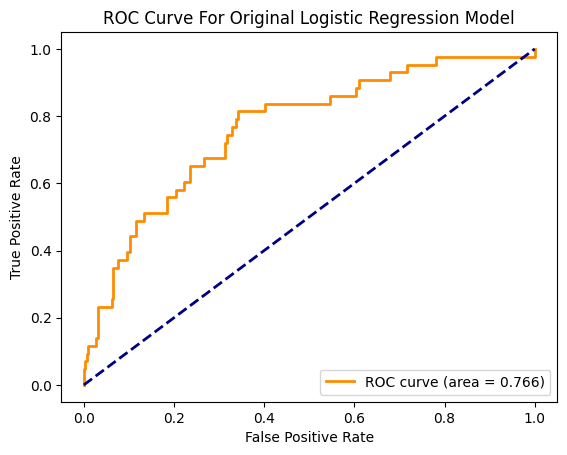

In [54]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve For Original Logistic Regression Model')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

In [55]:
df_test = sd_test.convert_to_dataframe()[0]

results_list=[]

for threshold in np.arange(0, 1, 0.01):
    #print('----------------------')
    #print(threshold)
    
    df_test['y_pred'] = 1*(y_test_prob>threshold)
    df_test_1=df_test[df_test['Gender']==1]
    df_test_0=df_test[df_test['Gender']==0]

    percent_pos_1 = df_test_1[df_test_1['y_pred']==1].shape[0]/df_test_1.shape[0]
    percent_pos_0 = df_test_0[df_test_0['y_pred']==1].shape[0]/df_test_0.shape[0]
    
    tn, fp, fn, tp = confusion_matrix(sd_test.labels, df_test['y_pred']).ravel()
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)

    mean_diff_basic_log_test = percent_pos_0-percent_pos_1

    results_list.append([threshold, tpr,tnr,mean_diff_basic_log_test, accuracy])
    
    
df_results = pd.DataFrame(results_list, columns=['threshold', 'tpr','tnr','statistical_parity', 'accuracy'])    
df_results    

,threshold,tpr,tnr,statistical_parity,accuracy
0,0.00,1.000000,0.000000,0.000000,0.127976
1,0.01,0.976744,0.191126,-0.007937,0.291667
2,0.02,0.953488,0.279863,0.057143,0.366071
3,0.03,0.906977,0.361775,0.015873,0.431548
4,0.04,0.860465,0.406143,0.049206,0.464286
...,...,...,...,...,...
95,0.95,0.000000,1.000000,0.000000,0.872024
96,0.96,0.000000,1.000000,0.000000,0.872024
97,0.97,0.000000,1.000000,0.000000,0.872024
98,0.98,0.000000,1.000000,0.000000,0.872024


In [56]:
np.abs(df_results[(df_results['tpr']>=.5) & (df_results['tnr']>=.5)]).sort_values(by=['accuracy'], ascending=False)



,threshold,tpr,tnr,statistical_parity,accuracy
23,0.23,0.511628,0.866894,0.014286,0.821429
22,0.22,0.511628,0.846416,0.023810,0.803571
21,0.21,0.511628,0.832765,0.030159,0.791667
20,0.20,0.558140,0.815700,0.047619,0.782738
19,0.19,0.558140,0.802048,0.066667,0.770833
18,0.18,0.581395,0.781570,0.046032,0.755952
17,0.17,0.651163,0.764505,0.058730,0.750000
16,0.16,0.651163,0.747440,0.047619,0.735119
15,0.15,0.674419,0.726962,0.026984,0.720238
14,0.14,0.674419,0.713311,0.033333,0.708333


In [57]:
# Section 5.5, Post Processing
# Then, we want to use LIME to make logistic regression more explainable
limeData = LimeEncoder().fit(sd_train)
X_lime_train = limeData.transform(sd_train.features)
X_lime_test = limeData.transform(sd_test.features)
explainer = lime.lime_tabular.LimeTabularExplainer(X_lime_train ,class_names=limeData.s_class_names, 
                                                   feature_names = limeData.s_feature_names,
                                                   categorical_features=limeData.s_categorical_features, 
                                                   categorical_names=limeData.s_categorical_names, 
                                                   kernel_width=25, verbose=False,discretize_continuous=True)


In [58]:
def get_pred_class_probs(x):
   
    #1. Converts the lime-encoded features matrix back to an numpy array that does not have one-hot encoding
    lime_unencode_x = limeData.inverse_transform(x)
    
    #2. Drops the sensitive attributes
    df_lime = pd.DataFrame(lime_unencode_x, columns=sd_test.feature_names)
    df_lime = df_lime.drop(['Gender'], axis=1)
    lime_unencode_x = df_lime.to_numpy()
    
    #3. Creates predictive class probabilities from the main model
    pred_class_probs = model_1.predict_proba(lime_unencode_x)

    return pred_class_probs


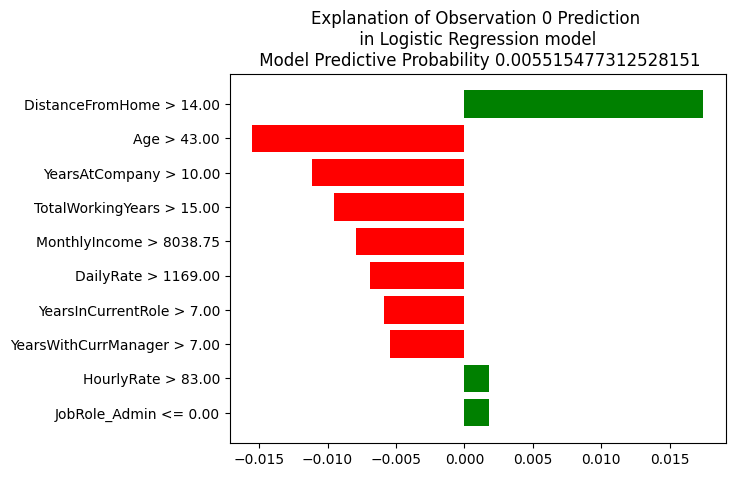

In [59]:
obs = 0
np.random.seed(100)
exp = explainer.explain_instance(X_lime_test[obs],
                                 get_pred_class_probs,
                                 num_features=10
                                )
exp.as_pyplot_figure()
plt.title('Explanation of Observation %s Prediction \n in Logistic Regression model \n Model Predictive Probability %s'%(obs, y_test_prob[0]))
plt.show()

In [60]:
exp.as_list()

[('DistanceFromHome > 14.00', 0.017454332354244678),
 ('Age > 43.00', -0.015502271163624374),
 ('YearsAtCompany > 10.00', -0.011111073569675415),
 ('TotalWorkingYears > 15.00', -0.009509560375908752),
 ('MonthlyIncome > 8038.75', -0.007933389212031683),
 ('DailyRate > 1169.00', -0.0068690904362133254),
 ('YearsInCurrentRole > 7.00', -0.005874636397143845),
 ('YearsWithCurrManager > 7.00', -0.005407851451208351),
 ('HourlyRate > 83.00', 0.0018091724658622782),
 ('JobRole_Admin <= 0.00', 0.001804002058137812)]

Explaination For LIME Model: <br>
LIME gives a set of explanations for a specific sample (SAMPLE 0 in this case). Each of these elements (features) represents a characteristic that can be interpreted as attributes or background information about certain employees, such as their age, work experience, monthly income, daily hours worked, and so on. The figure above, along with the results of LIME output, provides the 10 characteristics that have the greatest impact on the predicted value. LIME's interpretation results show that among these features, DistanceFromHome, Age, YearsAtCompany, TotalWorkingYears, MonthlyIncome and other features have a relatively great impact on the prediction results of the model. For example, DistanceFromHome > 14.00 indicates that when the distance from home is greater than 14 miles, it will have a positive impact of 0.0174 on the predicted result of the model, which may mean that employees with farther distance are more likely to quit.

## 6. Predictive Model 2

The Other Predictive Model I want to use is Random Forest Model.

In [61]:
from sklearn.ensemble import RandomForestClassifier
from aif360.algorithms.inprocessing import PrejudiceRemover
from aif360.algorithms.postprocessing import EqOddsPostprocessing

In [62]:
# first find best eta for PrejudiceRemover
eta_list = [0,.01, .1, .5, 1, 10]
final_result_df = pd.DataFrame(columns=['eta', 'auc', 'threshold', 'accuracy', 'tpr', 'tnr', 'statistical_parity'])

for eta in eta_list:
    pr = PrejudiceRemover(sensitive_attr='Gender', class_attr='Attrition', eta=eta).fit(sd_train)
    sd_test_results = pr.predict(sd_test)
    y_test_prob = sd_test_results.scores.ravel()
    fprs, tprs, thresholds = roc_curve(y_true=sd_test.labels, y_score=y_test_prob)
    auc = roc_auc_score(y_true=sd_test.labels, y_score=y_test_prob)
    df_test = sd_test.convert_to_dataframe()[0]

    results_list=[]

    for threshold in np.arange(0, 1, 0.01):
        df_test['y_pred'] = 1*(y_test_prob>threshold)
        df_test_1=df_test[df_test['Gender']==1]
        df_test_0=df_test[df_test['Gender']==0]

        percent_pos_1 = df_test_1[df_test_1['y_pred']==1].shape[0]/df_test_1.shape[0]
        percent_pos_0 = df_test_0[df_test_0['y_pred']==1].shape[0]/df_test_0.shape[0]

        tn, fp, fn, tp = confusion_matrix(sd_test.labels, df_test['y_pred']).ravel()
        tpr = tp/(tp+fn)
        tnr = tn/(tn+fp)
        accuracy = (tp+tn)/(tp+tn+fp+fn)

        mean_diff_basic_log_test = percent_pos_0-percent_pos_1

        results_list.append([threshold, accuracy, tpr, tnr, mean_diff_basic_log_test])

    df_results = pd.DataFrame(results_list, columns=['threshold', 'accuracy', 'tpr', 'tnr', 'statistical_parity'])
    df_results['statistical_parity_abs'] = np.abs(df_results['statistical_parity'])
    df_results_filtered = df_results[(df_results['tpr']>=0.5) & (df_results['tnr']>=0.5)].sort_values(by=['statistical_parity_abs'], ascending=True)
    df_results_filtered['eta'] = eta

    if not df_results_filtered.empty:
        row = df_results_filtered.iloc[0]
        final_result_df = pd.concat([final_result_df, pd.DataFrame([[row['eta'], auc, row['threshold'], row['accuracy'], row['tpr'], row['tnr'], row['statistical_parity']]], columns=['eta', 'auc', 'threshold', 'accuracy', 'tpr', 'tnr', 'statistical_parity'])], ignore_index=True)



In [63]:
final_result_df

,eta,auc,threshold,accuracy,tpr,tnr,statistical_parity
0,0.00,0.875704,0.08,0.770833,0.813953,0.764505,0.025397
1,0.01,0.875466,0.08,0.770833,0.813953,0.764505,0.025397
2,0.10,0.875387,0.07,0.747024,0.813953,0.737201,0.025397
3,0.50,0.875387,0.07,0.747024,0.813953,0.737201,0.025397
4,1.00,0.875308,0.07,0.747024,0.813953,0.737201,0.025397
5,10.00,0.875308,0.07,0.747024,0.813953,0.737201,0.025397


In [64]:
min_eta_row = final_result_df.loc[final_result_df['statistical_parity'].abs().idxmin()]
min_eta = min_eta_row['eta']
min_eta

0.1

Then, after using PrejudiceRemover, we got a model that has accuracy 0.747024 and statistical_parity of 0.025397.

In [65]:
# Then, we want to use random forest model as our main model to fit
model_2 = RandomForestClassifier(n_estimators=1000, random_state=100)
model_2.fit(X_train, Y_train)
test_predict_probs = model_2.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_true=sd_test.labels, 
                            y_score=test_predict_probs)
auc = roc_auc_score(y_true=sd_test.labels, 
                            y_score=test_predict_probs)
auc


0.9203111358044289

In [66]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

df_test = sd_test.convert_to_dataframe()[0]

results_list = []

for threshold in np.arange(0, 1, 0.01):
    df_test['y_pred'] = 1 * (test_predict_probs > threshold)
    df_test_1 = df_test[df_test['Gender'] == 1]
    df_test_0 = df_test[df_test['Gender'] == 0]

    # Confusion matrix for race=1
    tn_1, fp_1, fn_1, tp_1 = confusion_matrix(df_test_1['Attrition'], df_test_1['y_pred']).ravel()
    tpr_1 = tp_1 / (tp_1 + fn_1)
    tnr_1 = tn_1 / (tn_1 + fp_1)
    fpr_1 = fp_1/(tn_1+fp_1)
    

    # Confusion matrix for race=0
    tn_0, fp_0, fn_0, tp_0 = confusion_matrix(df_test_0['Attrition'], df_test_0['y_pred']).ravel()
    tpr_0 = tp_0 / (tp_0 + fn_0)
    tnr_0 = tn_0 / (tn_0 + fp_0)
    fpr_0 = fp_0/(tn_0+fp_0)

    # Confusion matrix for all races
    tn, fp, fn, tp = confusion_matrix(sd_test.labels, df_test['y_pred']).ravel()
    tpr = tp/(tp+fn)
    tnr = tn/(tn+fp)

    accuracy = (tp+tn)/(tp+tn+fp+fn)
    equalized_odds = np.average([np.abs(tpr_1-tpr_0), np.abs(fpr_1-fpr_0)])

    results_list.append([threshold, tpr, tnr, accuracy, equalized_odds])

df_results = pd.DataFrame(results_list, columns=['threshold', 'tpr', 'tnr', 'accuracy', 'equalized_odds'])
df_results


,threshold,tpr,tnr,accuracy,equalized_odds
0,0.00,1.000000,0.006826,0.133929,0.009901
1,0.01,1.000000,0.139932,0.250000,0.044322
2,0.02,0.976744,0.266212,0.357143,0.035960
3,0.03,0.976744,0.372014,0.449405,0.045887
4,0.04,0.976744,0.447099,0.514881,0.056587
...,...,...,...,...,...
95,0.95,0.000000,1.000000,0.872024,0.000000
96,0.96,0.000000,1.000000,0.872024,0.000000
97,0.97,0.000000,1.000000,0.872024,0.000000
98,0.98,0.000000,1.000000,0.872024,0.000000


In [67]:
np.abs(df_results[(df_results['tpr']>=.5) & (df_results['tnr']>=.5)]).sort_values(by=['accuracy'], ascending = False)

,threshold,tpr,tnr,accuracy,equalized_odds
34,0.34,0.511628,0.969283,0.910714,0.066106
33,0.33,0.534884,0.965870,0.910714,0.081155
32,0.32,0.534884,0.965870,0.910714,0.081155
30,0.30,0.581395,0.959044,0.910714,0.030808
28,0.28,0.604651,0.952218,0.907738,0.056017
31,0.31,0.534884,0.959044,0.904762,0.086364
29,0.29,0.581395,0.952218,0.904762,0.036017
27,0.27,0.604651,0.945392,0.901786,0.053670
26,0.26,0.604651,0.935154,0.892857,0.061483
25,0.25,0.627907,0.931741,0.892857,0.028754


In [68]:
# Then, we want to perform Equality of Odds as Post-Processing
train_predict_probs = model_2.predict_proba(X_train)[:,1]
train_best_result = 1 * (train_predict_probs > 0.34)
sd_train_pred = sd_train.copy(deepcopy=True)
sd_train_pred.scores = train_predict_probs.reshape(-1,1)
sd_train_pred.labels = train_best_result.reshape(-1,1)

In [69]:
test_best_result = 1 * (test_predict_probs > 0.34)
sd_test_pred = sd_test.copy(deepcopy=True)
sd_test_pred.scores = test_predict_probs.reshape(-1,1)
sd_test_pred.labels = test_best_result.reshape(-1,1)

In [70]:
privileged_groups = [{'Gender': 1}]
unprivileged_groups = [{'Gender': 0}]

eop = EqOddsPostprocessing(privileged_groups = privileged_groups,
                                     unprivileged_groups = unprivileged_groups,
                                     seed=200)
eop=eop.fit(sd_train, sd_train_pred)

In [71]:
sd_test_pert=eop.predict(sd_test_pred)

In [72]:
tn, fp, fn, tp = confusion_matrix(sd_test.labels, sd_test_pert.labels).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"accuracy: {accuracy}")

accuracy: 0.9107142857142857


In [73]:
df_test_pert = sd_test_pert.convert_to_dataframe()[0]
df_test_pert['y_pred'] = sd_test_pert.labels.ravel()
df_test_pert_1 = df_test_pert[df_test_pert['Gender'] == 1]
df_test_pert_0 = df_test_pert[df_test_pert['Gender'] == 0]

# Confusion matrix for race=1
tn_1, fp_1, fn_1, tp_1 = confusion_matrix(df_test_1['Attrition'], df_test_pert_1['y_pred']).ravel()
tpr_1 = tp_1 / (tp_1 + fn_1)
tnr_1 = tn_1 / (tn_1 + fp_1)
fpr_1 = fp/(tn+fp)

# Confusion matrix for race=0
tn_0, fp_0, fn_0, tp_0 = confusion_matrix(df_test_0['Attrition'], df_test_pert_0['y_pred']).ravel()
tpr_0 = tp_0 / (tp_0 + fn_0)
tnr_0 = tn_0 / (tn_0 + fp_0)
fpr_0 = fp/(tn+fp)

equalized_odds = np.average([np.abs(tpr_1-tpr_0), np.abs(fpr_1-fpr_0)])
equalized_odds


0.05777777777777782

It's clear to see that after using Equality of Odds, accuracy decrease but equalized_odds increase significantly.

In [74]:
# Then, we want to use LIME to explain the result
def get_pred_class_probs(x):
   
    #1. Converts the lime-encoded features matrix back to an numpy array that does not have one-hot encoding
    lime_unencode_x = limeData.inverse_transform(x)
    
    #2. Drops the sensitive attributes
    df_lime = pd.DataFrame(lime_unencode_x, columns=sd_test.feature_names)
    df_lime = df_lime.drop(['Gender'], axis=1)
    lime_unencode_x = df_lime.to_numpy()
    
    #3. Creates predictive class probabilities from the main model
    pred_class_probs = model_2.predict_proba(lime_unencode_x)

    return pred_class_probs

obs = 0

np.random.seed(100)
exp = explainer.explain_instance(X_lime_test[obs],
                                 get_pred_class_probs,
                                 num_features=10,
                                 num_samples=900)
exp.as_list()

[('OverTime <= 0.00', -0.12418800064044648),
 ('Shift <= 0.00', 0.03232377609939164),
 ('MonthlyIncome > 8038.75', -0.029354463028465904),
 ('2.00 < JobInvolvement <= 3.00', -0.027679961721715152),
 ('DistanceFromHome > 14.00', 0.027634219759080137),
 ('0.00 < MaritalStatus_Single <= 1.00', 0.024744944022278195),
 ('Age > 43.00', -0.023073773475505294),
 ('EducationField_Human Resources <= 0.00', -0.02169035126169813),
 ('EducationField_Technical Degree <= 0.00', -0.01768332363648855),
 ('2.00 < WorkLifeBalance <= 3.00', -0.01577950297047327)]

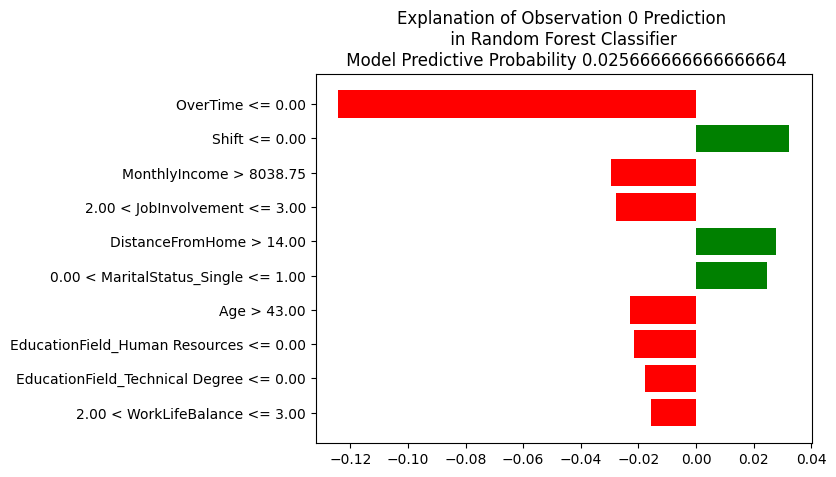

In [75]:
exp.as_pyplot_figure()
plt.title('Explanation of Observation %s Prediction \n in Random Forest Classifier \n Model Predictive Probability %s'%(obs, test_predict_probs[obs]))
plt.show()

Explaination For LIME Model: <br>
LIME gives a set of explanations for a specific sample (SAMPLE 0 in this case). Each of these elements (features) represents a characteristic that can be interpreted as attributes or background information about certain employees, such as their Overtime, Shift, MonthlyIncome, and so on. The figure above, along with the results of LIME output, provides the 10 characteristics that have the greatest impact on the predicted value. LIME's interpretation results show that among these features, Overtime, Shift, MonthlyIncome, and other features have a relatively great impact on the prediction results of the model. For example, Overtime indicates that when employee are more inclined to work overtime, it will have a negative impact of -0.12418800064044648 on the predicted result of the model, which may mean that employees with this feature are more unlikely to quit.

## 7. Model Evaluation and Discussion

1. Generally, logistic regression model have more explainability than random forest model. In this case, both models utilize LIME Explainer model, which represents the weights of different characteristics on attrition result. Thus, both model should be equally explainable. 
2. The best classfication for the logistic regression model is at 0.23 threshold, and has 0.511628 tpr, 0.866894 tnr,	0.014286 statistical parity, and 0.821429 accuracy. The best classfication for the random forest model is at 0.34 threshold, and has 0.511628 tpr, 0.969283 tnr, 0.910714 accuracy, and 0.066106 equalized odds. Both model produce good tnr results, which show a significant number workers are successfully classified to not resign, which significantly reduce the chance of wrongly classified someone who does not want to resign the opposite. We could see that the random forest model produces higher accuracy and more fair results.
3. Taken the example from above, TPR of 0.511628 means the model correctly identify about 51% of positive outcomes, which is someone who decide to resign. TNR of 0.866894 means the model correctly identify about 87% of negative outcomes, which is someone who does not decide to resign. Statistical parity of 0.014286 meansthe difference between the rate of positive outcomes for the minority group and the rate of positive outcomes for the majority group, while 0 means perfect fairness. 0.014286 is pretty fair in this situation. Accuracy of 0.821429 means the model is making correct predictions approximately 82.14% of the time. For equalized odds, a value of 0.066106 suggests there is a small disparity between the groups. The model is slightly more likely to correctly predict positive outcomes (true positive rate) or falsely predict positive outcomes (false positive rate) for one group compared to the other.

## 8. Conclusion and Insights Summary

Overall, both models perform well. Both model produced good classfication rates and relatively good outcome in fairness metrics. It's noteworthy that working overtime actually significantly contribute to healthcare workers not resign. This might be due to the overloaded work nature of healthcare industries, especially during pandemic, and that the general healthcare workers acquiesce the overwork practice, likely for good cause of helping patients to recover. Besides from force majeure reasons, it usually takes very major reasons account for the voluntary leave of healthcare workers, like shift-work, long commute from work, and salary. Therefore, potential stakeholders of the classification algorithm should carefully look into the reasons and try to improve the working conditions of healthcare workers. For further work, we could examine the numerical values in the dataset to further investigate how different features contribute to the attrition rate of healthcare workers, and whether these features brings fairness concerns. 

## 9. Group Contribution Report

Yuteng Zhuang: part 2,3,5,6
Yijun Wang: part 1,4,7,8

### Have a nice summer vacation! 😎☀️🌴